<a href="https://colab.research.google.com/github/isha027/SEIRD-model/blob/main/SEIRD_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEIRD (Susceptible, Exposed, Infected, Recovered, Deceased) model

Implemented a compartmental model such that:

Transitions from one compartment to another are represented by arrows, with the following labeling: (rate⋅probability⋅population) where:

rate = the duration the transition takes

population = the group of individuals that this transition applies to

probability = the probability of the transition taking place for an individual

dS/dt = –(r)(S/N)(βI) (r = rate of susceptibles becoming exposed = 1, we assume that exposure to infections happen immediately)

=> dS/dt = –(S/N)(βI)

dE/dt = (r)(S/N)(βI) – δ(q)E (q = probability of exposed becoming infected = 1, we assume that all exposed will become infected)

=> dE/dt = (S/N)(βI) – δE

dI/dt = δ(q)E – ραI – γ(1-α)I (probability of infected dying = fatality rate = α, probability of infected recovering = (1–α))

=> dI/dt = δE – ραI – γ(1-α)I

dR/dt = γ(1–α)I

dD/dt = ραI

Using the change in the number of susceptible, exposed, infected, recovered and deceased people, we can calculate the number of suceptible (S(t)), exposed (E(t)), infected (I(t)), recovered (R(t)) and deceased (D(t)) people for each day, t. (We solved for S(t), E(t), I(t), R(t) and D(t), using odeint from scipy.integrate)

Important variables and their definitions:

N = total population

S(t) = number of people susceptible on day t

E(t) = number of people exposed on day t

I(t) = number of people infected on day t

R(t) = number of people recovered on day t

D(t) = number of people dead on day t

β = expected amount of people an infected person infects per day

D = number of days an infected person has and can spread the disease, that is, the number of days the infection lasts

γ = the rate of recovery/the proportion of infected recovering per day (γ = 1/D)

R₀ = the total number of people an infected person infects (R₀ = β / γ)

δ = Rate of infection after exposure/length of incubation period

α = fatality rate

ρ = rate at which people die (= 1/days from infection until death)

The image below describes the compartmental model:

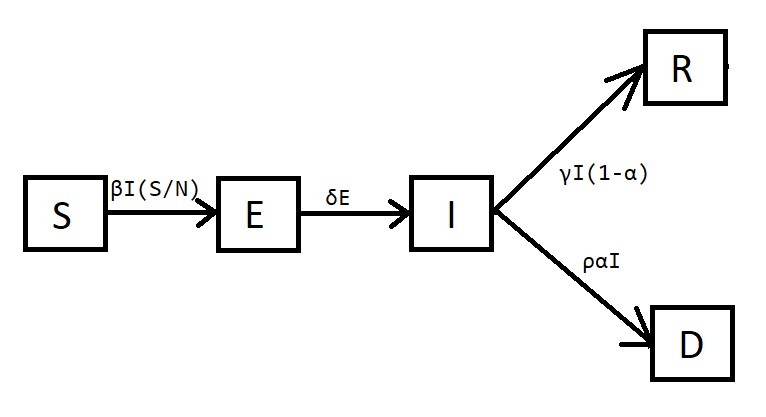

In [1]:
N = 1000 # Total Population
Ld = None

# R_0: reproduction number, total number of people an infected person infects
# Illustrated two examples of reproduction number:
# Example 1: Constant R_0:
# R_0 = 5.0

# Example 2: Time-dependent R_0:
# Chosen a time dependent variable R_0 such that after day 'Ld', a lockdown is enforced,
# pushing R_0 to 0.9, from 15.0

Ld = 40
def R_0(t):
  if(t <= Ld):
    return 15.0
  else:
    return 0.9

D1 = 4.0 # Infection lasts for 4 days

# beta: Expected amount of people an infected person exposes per day
# Based on the examples of reproduction number:

# Based on example 1 for R_0: beta for constant R_0:
# beta = R_0/D1

# Based on example 2 for R_0: beta for time dependent R_0: (Example 2)
def beta(t):
  return R_0(t)/D1

D2 = 5.0 # Incubation period of 5 days after exposure
D3 = 9.0 # Days between infection till death
gamma = 1.0/D1 # Rate of recovery/proportion of infected recovering per day
delta = 1.0/D2 # Rate of infection after exposure/rate at which the exposed will get infected
rho = 1.0/D3 # Rate at which people die after infection

# alpha: Fatality/death rate, probability of infected people to die
# Illustrated two examples of alpha:

# Example 1: Constant fatality rate, irrespective of age:
# alpha = 0.2

# Example 2: Fatality rate according to age group:
alpha_ag = {"0-35": 0.02, "35-59": 0.04, "60-79": 0.1, "79+": 0.2} # alpha according to age groups
proportion_ag = {"0-35": 0.26, "35-59": 0.25, "60-79": 0.34, "79+": 0.15} # proportion of total population that is in the age groups.
alpha = sum((alpha_ag[i] * proportion_ag[i]) for i in list(alpha_ag.keys())) # overall average fatality rate
n = (1.0 - alpha) # Probability of infected people to recover = 1 - alpha

# Initial conditions:
[S0, E0, I0, R0, D0] = [N-1, 1, 0, 0, 0] #one exposed, rest susceptible

In [2]:
def derivatives(y, t, N, beta, gamma, delta, alpha, n):
  [S, E, I, R, D] = y
  # when beta is time dependent:
  dSdt = -beta(t)*S*I/N
  dEdt = (beta(t)*S*I/N) - (delta*E)
  # when beta is constant:
  # dSdt = (-1)*beta*S*I/N
  # dEdt = (beta*S*I/N) - (delta*E)
  dIdt = (delta*E) - (gamma*n*I) - (rho*alpha*I)
  dRdt = gamma*n*I
  dDdt = rho*alpha*I
  return dSdt, dEdt, dIdt, dRdt, dDdt

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = [S0, E0, I0, R0, D0] # Initial conditions

# Solving the differential equations using odeint from scipy.integrate:
# Integrate SEIRD model over time grid, t, to calculate the amount of population in each compartment:
res = odeint(derivatives, y0, t, args=(N, beta, gamma, delta, alpha, n))
[S, E, I, R, D] = res.T

# R_0_over_time = [R_0 for i in range(len(t))]  # to plot R_0 over time: evaluating function values, based on example 1 of reproduction number
R_0_over_time = [R_0(i) for i in range(len(t))]  # to plot R_0 over time: evaluating function values, based on example 2 of reproduction number
# alpha_over_time = [alpha for i in range(len(t))]  # to plot alpha over time: evaluating function values, based on example 1 of alpha
alpha_over_time = [alpha for i in range(len(t))]  # to plot alpha over time: evaluating function values, based on example 2 of alpha
# alpha: age dependent fatality rate, overall average fatality rate
alpha_over_age = [(alpha_ag[i] * proportion_ag[i]) for i in list(alpha_ag.keys())] # to plot alpha over age and proportion: evaluating function values, based on example 2 of alpha
# (alpha_ag[i] * proportion_ag[i]) is the contribution of the age group to the overall average fatality rate

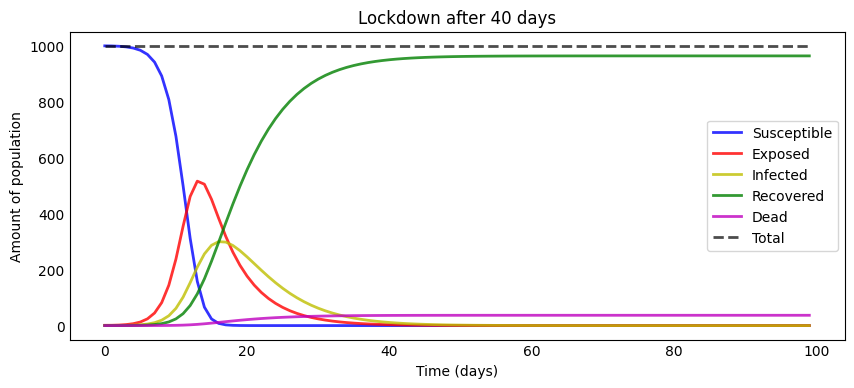

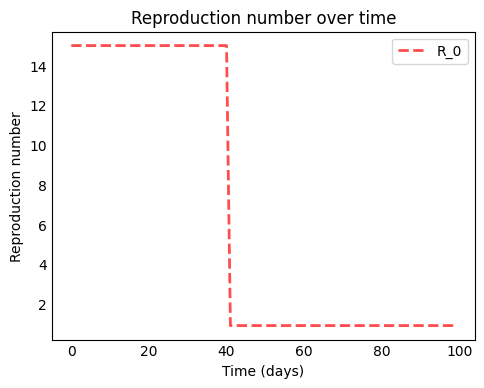

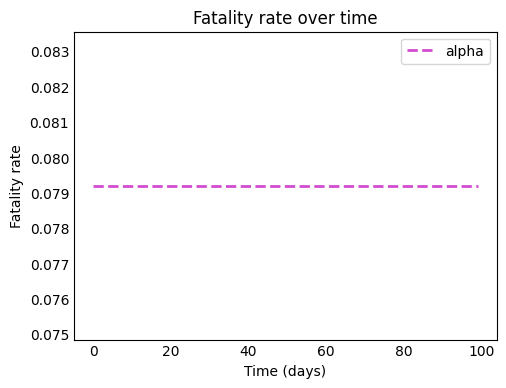

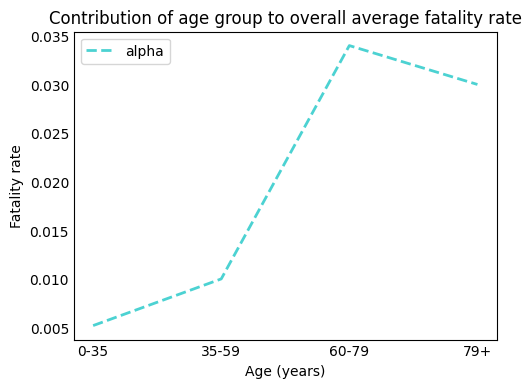

In [4]:
def plotseird(t, S, E, I, R, D, L = Ld, R_0=R_0_over_time, Alpha=alpha_over_time, alp = alpha_over_age):

  # Plotting S, E, I, R, D:
  f0, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.8, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'r', alpha=0.8, linewidth=2, label='Exposed')
  ax.plot(t, I, 'y', alpha=0.8, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.8, linewidth=2, label='Recovered')
  ax.plot(t, D, 'm', alpha=0.8, linewidth=2, label='Dead')
  ax.plot(t, S+E+I+R+D, 'k--', alpha=0.7, linewidth=2, label='Total')
  ax.set_ylabel('Amount of population')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  legend = ax.legend()

  # Mentioning when the lockdown started/was implemented:
  if L is not None:
      plt.title("Lockdown after {} days".format(L))

  # Plotting reproduction number:
  if R_0 is not None:
    f1 = plt.figure(figsize=(12,4))
    ax1 = f1.add_subplot(121)
    ax1.plot(t, R_0, 'r--', alpha=0.7, linewidth=2, label='R_0')
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Reproduction number')
    ax1.title.set_text('Reproduction number over time')
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    legend = ax1.legend()

  # Plotting the fatality rate with respect to time:
  if Alpha is not None:
    f2 = plt.figure(figsize = (12, 4))
    ax2 = f2.add_subplot(122)
    ax2.plot(t, Alpha, 'm--', alpha=0.7, linewidth=2, label='alpha')
    ax2.set_xlabel('Time (days)')
    ax2.set_ylabel('Fatality rate')
    ax2.title.set_text('Fatality rate over time')
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    legend = ax2.legend()

  # Plotting the fatality rate with respect to age:
  if alp is not None:
    f2 = plt.figure(figsize = (12, 4))
    ax2 = f2.add_subplot(122)
    ax2.plot(list(alpha_ag.keys()), alp, 'c--', alpha=0.7, linewidth=2, label='alpha')
    ax2.set_xlabel('Age (years)')
    ax2.set_ylabel('Fatality rate')
    ax2.title.set_text('Contribution of age group to overall average fatality rate')
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    legend = ax2.legend()

  plt.show();
plotseird(t, S, E, I, R, D)

In [5]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=S, mode='lines+markers', name='Susceptible'))
fig.add_trace(go.Scatter(x=t, y=E, mode='lines+markers', name='Exposed'))
fig.add_trace(go.Scatter(x=t, y=I, mode='lines+markers', name='Infected'))
fig.add_trace(go.Scatter(x=t, y=R, mode='lines+markers',name='Recovered'))
fig.add_trace(go.Scatter(x=t, y=D, mode='lines+markers',name='Death'))
fig.update_layout(title='Simulation of SEIRD Model <br> Lockdown after {} days'.format(Ld), xaxis_title='Day', yaxis_title='Counts', title_x=0.5, width=900, height=600)
fig.update_xaxes(tickangle=-90, tickformat = None, tickmode='array')
fig.show()